# Cours Programmation Dynamique
## Itération sur Politique

### Adaptation : Fabrice Mulotti
v1.0

In [115]:
import gym
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt

if "../" not in sys.path:
  sys.path.append("../") 

from lib.envs.windy_gridworld import WindyGridworldEnv

# Disable jedi autocompleter
%config Completer.use_jedi = False
# %matplotlib inline
# %matplotlib widget


### Déclaration env

In [103]:
env = gym.make('FrozenLake8x8-v1',is_slippery = True)
# env = gym.make('FrozenLake-v1',is_slippery=False)


In [104]:
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


### Quelques caractéristiques de notre env

In [105]:
env.observation_space.n

64

In [106]:
env.action_space.n

4

env.P[s] nous permet de déterminer en fonction de l'état s et de l'action a:
prob , s' , r , final ?

In [107]:
env.P[0]

{0: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 8, 0.0, False)],
 1: [(0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 1, 0.0, False)],
 2: [(0.3333333333333333, 8, 0.0, False),
  (0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)],
 3: [(0.3333333333333333, 1, 0.0, False),
  (0.3333333333333333, 0, 0.0, False),
  (0.3333333333333333, 0, 0.0, False)]}

In [108]:
env.P[0][0][0]

(0.3333333333333333, 0, 0.0, False)

![title](static/policy_iteration.png)

In [109]:
# Recherche de v*
def policy_iteration(env,theta,max_iter,gamma):
    deltaT = []

    # Initialisation
    fvalue=np.full(env.observation_space.n,0.0)
    # policy=np.full(env.observation_space.n,0.0)
    policy=np.random.randint(0,env.action_space.n,env.observation_space.n)
    # Boucle principale
    for i in range(max_iter):
        save_policy=np.copy(policy)
        # évluation fonction de valeur basé sur la politique
        for k in range(max_iter):
            save_fvalue=np.copy(fvalue)
            delta=0
            for s in range(env.observation_space.n):  
                a=policy[s] # nous ne testons plus l'ensemble des actions possibles mais selon la politique actuelle
                q=0
                for p,s_,r,done in env.P[s][a]:
                    q = q + p * (r + gamma * save_fvalue[s_])
                    # print("s=",s," a=",a," s_=",s_,"q = ",q,"[",p,r,"]")
                fvalue[s] = q
                delta=max(delta,abs(fvalue[s] - save_fvalue[s]))
            
            if (delta < gamma):
                break
        deltaT.append(delta)
        
        # Mise à jour de la politique
        for s in range(env.observation_space.n):
            Q = []
            for a in range(env.action_space.n):
                q=0
                for p,s_,r,done in env.P[s][a]:
                    q = q + p * (r + gamma * fvalue[s_])
                Q.append(q)
            # print(Q,np.argmax(np.array(Q)))
            policy[s]=np.argmax(Q)
        if np.array_equal(policy,save_policy):
            break
        
    return(i,fvalue,policy,deltaT)


14  itérations


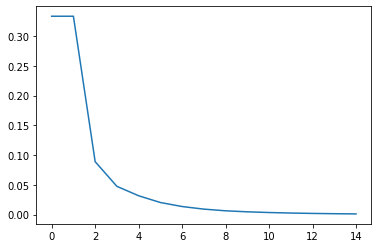

In [110]:
plt.ion()
k,fv,policy,deltaT=policy_iteration(env=env,theta=1e-20,max_iter=10000,gamma=0.8)
print(k," itérations")
plt.figure()
plt.plot(deltaT)
plt.show()

In [111]:
fv

array([1.66510158e-06, 1.04863852e-05, 5.40683884e-05, 2.15494426e-04,
       6.80591361e-04, 1.52223816e-03, 2.79987254e-03, 3.66099681e-03,
       4.17290700e-06, 1.70158554e-05, 7.04982399e-05, 2.85219067e-04,
       1.12974774e-03, 2.63317830e-03, 5.69492919e-03, 8.23245480e-03,
       7.88466400e-06, 2.29671520e-05, 5.50876004e-05, 0.00000000e+00,
       1.81496108e-03, 4.08066064e-03, 1.23692383e-02, 1.92566887e-02,
       1.35360742e-05, 4.71131393e-05, 1.74304826e-04, 6.48713256e-04,
       2.49582693e-03, 0.00000000e+00, 2.39433158e-02, 4.34208309e-02,
       7.52068644e-06, 2.01823405e-05, 4.29514390e-05, 0.00000000e+00,
       7.58109852e-03, 1.79504819e-02, 3.67659428e-02, 9.85239882e-02,
       1.75054052e-06, 0.00000000e+00, 0.00000000e+00, 2.50212500e-03,
       9.02015933e-03, 2.45608752e-02, 0.00000000e+00, 2.30526062e-01,
       1.80432300e-06, 0.00000000e+00, 1.86371969e-04, 6.84348743e-04,
       0.00000000e+00, 6.61914255e-02, 0.00000000e+00, 5.37869869e-01,
      

In [112]:
np.save("iteration_valeur_best_policy",policy)

In [113]:
s=int(np.sqrt(env.observation_space.n))
policy.reshape(s,s)


array([[1, 2, 2, 2, 2, 2, 2, 2],
       [1, 2, 2, 3, 2, 2, 2, 1],
       [1, 2, 0, 0, 2, 3, 2, 1],
       [3, 2, 3, 1, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 1, 3, 2],
       [0, 0, 0, 1, 3, 0, 0, 2],
       [0, 0, 1, 0, 0, 0, 0, 2],
       [1, 1, 0, 0, 1, 1, 1, 0]])

# Testons l'environnement

0: LEFT <br>
1: DOWN<br>
2: RIGHT<br>
3: UP<br>

In [114]:
curpos=env.reset()
env.render()
print(policy)
done=False
print("Start")
i=0
while done == False:
    back=env.step(int(policy[curpos]))
    # print("Curpos ",curpos,", Policy ",policy[curpos],back)
    curpos=back[0]
    done=back[2]
    i+=1
    # env.render()
    # time.sleep(1)
print("Done in ",i," moves. Data=",back)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
[1 2 2 2 2 2 2 2 1 2 2 3 2 2 2 1 1 2 0 0 2 3 2 1 3 2 3 1 0 0 2 1 3 3 0 0 2
 1 3 2 0 0 0 1 3 0 0 2 0 0 1 0 0 0 0 2 1 1 0 0 1 1 1 0]
Start
Done in  37  moves. Data= (63, 1.0, True, {'prob': 0.3333333333333333})
